# MNIST deez nuts

In [1]:
import comet_ml
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow.keras.backend as K

from sklearn.metrics import classification_report

In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
comet_ml.init()
experiment = comet_ml.Experiment(project_name='juan-ai',
                                 auto_histogram_weight_logging=True,
                                 auto_histogram_gradient_logging=True,
                                 auto_histogram_activation_logging=True,)


experiment.set_name('delete kardo')

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/wereign/juan-ai/638a1b31bc0a430a9ded8ec2725770be
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (6.85 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter envi

In [6]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [11]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               204928    
                                                                 
 dense_1 (

In [13]:
parameters = {
    "epochs":100,
    "optimizer":"rmsprop",
    "loss":"categorical_crossentropy",
    "validation_split":0.3
}

experiment.log_parameters(parameters)

In [15]:
h=model.fit(X_train, y_train_cat, batch_size=128, epochs=30, verbose=1, validation_split=0.3)

Epoch 1/30
329/329 [==============================] - 11s 35ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0658 - val_accuracy: 0.9829
Epoch 2/30
329/329 [==============================] - 12s 35ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0791 - val_accuracy: 0.9797
Epoch 3/30
329/329 [==============================] - 12s 36ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0709 - val_accuracy: 0.9814
Epoch 4/30
329/329 [==============================] - 11s 33ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0716 - val_accuracy: 0.9825
Epoch 5/30
329/329 [==============================] - 10s 31ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0708 - val_accuracy: 0.9828
Epoch 6/30
329/329 [==============================] - 11s 33ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0806 - val_accuracy: 0.9794
Epoch 7/30
329/329 [==============================] - 11s 32ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0714 - val_accuracy:

In [15]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9913


[0.06071756035089493, 0.9912999868392944]

Text(0.5, 0, 'Epochs')

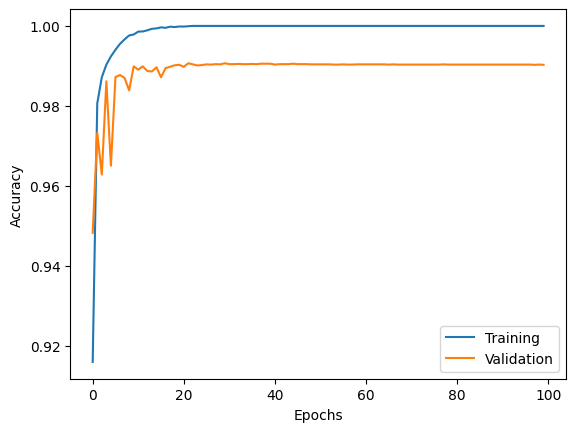

In [16]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
prediction = model.predict(X_test)


pred_classes = np.argmax(prediction,axis=-1)
print(pred_classes[:7])
print(y_test[:7])
cm = confusion_matrix(y_test, pred_classes)
print(classification_report(y_test,pred_classes))
experiment.log_confusion_matrix(matrix=cm)

313/313 [==============================] - 1s 3ms/step
[7 2 1 0 4 1 4]
[7 2 1 0 4 1 4]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



{'web': 'https://www.comet.com/api/asset/download?assetId=3adeab78768c4239bf2291acade42d5d&experimentKey=8d8231bd6976418896fbbb19c6112396',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=3adeab78768c4239bf2291acade42d5d&experimentKey=8d8231bd6976418896fbbb19c6112396',
 'assetId': '3adeab78768c4239bf2291acade42d5d'}

In [17]:
model.save('./mnist.keras')

In [18]:
model.save('./mnist_keras.h5')

c:\Users\viren\miniconda3\envs\autogluon_env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/wereign/juan-ai/8d8231bd6976418896fbbb19c6112396


COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [63]                 : (0.11359523981809616, 0.999404788017273)
COMET INFO:     batch_accuracy [2082]         : (0.1015625, 1.0)
COMET INFO:     batch_loss [2082]             : (0.00029554683715105057, 2.305805206298828)
COMET INFO:     epoch_duration [63]           : (10.17199999999957, 14.484000000000378)
COMET INFO:     loss [63]                     : (0.0024887314066290855, 2.3014681339263916)
COMET INFO:     val_accuracy [63]             : (0.10794444382190704, 0.984333336353302)
COMET INFO:     val_loss [63]                 : (0.0658048540353775, 2.301764965057373)
COMET INFO:     validate_batch_accuracy [945] : (0.10775619000196457, 0.9921875)
COMET INFO:     validate_batch_loss [945]     : (0.02850913628935814, 2.3019351959228516)
COMET INFO:   Others:
COMET INFO:     Name             : delete kardo
COMET INFO:     trainable_params : 225034
COMET INFO:   Parameters:
COMET INFO:     RMSprop_centered              